In [1]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    LinearRegression())

cv_result = cross_validate(model, data_numerical, target,
                           cv=10, return_estimator=True)

In [4]:
cv_result

{'fit_time': array([0.00614285, 0.00493169, 0.00486112, 0.004807  , 0.00480771,
        0.00478506, 0.00478935, 0.00479436, 0.00476646, 0.0047648 ]),
 'score_time': array([0.00165677, 0.00163341, 0.00161457, 0.00159502, 0.00162911,
        0.00158834, 0.00159216, 0.00157833, 0.00160193, 0.00158858]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]

In [5]:
coefs = [est[-1].coef_ for est in cv_result["estimator"]]
print(max(max(c) for c in coefs))
print(min(min(c) for c in coefs))

3.4302062667278464e+18
-4.131841968591183e+18


In [6]:
from sklearn.linear_model import Ridge


model_ridge = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    Ridge())

cv_result_ridge = cross_validate(model_ridge, data_numerical, target,
                           cv=10, return_estimator=True)

In [7]:
coefs = [est[-1].coef_ for est in cv_result_ridge["estimator"]]
print(max(max(c) for c in coefs))
print(min(min(c) for c in coefs))

22561.85645325165
-13781.812385930034


In [8]:
coefs

[array([  -520.70158275,   1394.33212568,   7678.61680461,   8808.47360021,
          -270.04186201,   2933.37271844,  11937.23363607,  10101.63592946,
         11967.57446293,  -1560.56403748,  17144.2495499 , -11423.49836632,
        -10983.43450527,  11977.87913684,   3343.51305422,  20868.21547323,
         -1863.8291009 ,   4547.32321758,   2195.31555562,  -2103.03222638,
          1697.55410967,   1685.28633808,  -2025.44652359,    378.42650356]),
 array([ -1106.39025093,   1148.03361104,   6637.36410647,   8564.80353074,
           -70.18122318,   3088.40141349,  11956.66847627,   9933.70007455,
         11842.69286253,  -2770.48629091,  16876.22344632, -11753.76412931,
        -11579.90734762,  12688.36228369,   3229.80610607,  20330.30482227,
         -2322.59347548,   5400.90102576,   1700.77383974,  -3120.94779506,
           883.08028296,    741.07713584,  -1787.55255192,    297.09559168]),
 array([  -164.13101872,    493.24114927,   6863.1836558 ,   8498.16963761,
        

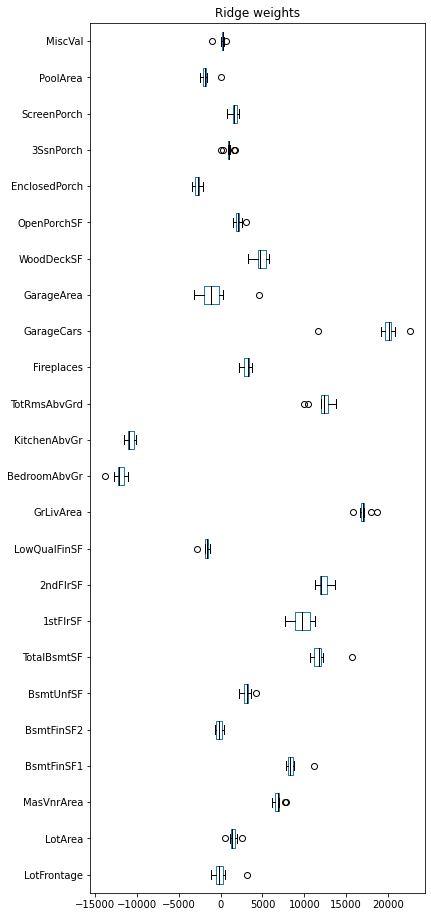

In [9]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}

weights_ridge = pd.DataFrame(coefs, columns=numerical_features)
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

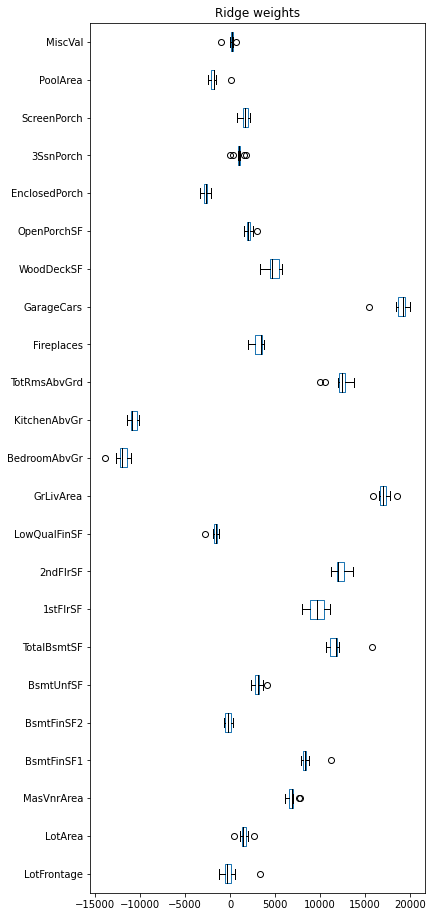

In [10]:
# The same model but dropping the GarageArea feature
non_cargarage = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_noncargarage = data[non_cargarage]

model_ridge = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    Ridge())

cv_result_ridge = cross_validate(model_ridge, data_noncargarage, target,
                           cv=10, return_estimator=True)

coefs = [est[-1].coef_ for est in cv_result_ridge["estimator"]]

weights_ridge = pd.DataFrame(coefs, columns=non_cargarage)
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

In [11]:
#Q6
import numpy as np
from sklearn.linear_model import RidgeCV

alphas=np.logspace(-1, 3, num=30)
ridge = make_pipeline(StandardScaler(),
                      SimpleImputer(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [12]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data_noncargarage, target,
                            cv=cv,
                            return_estimator=True,return_train_score=True,
                           n_jobs=-1)

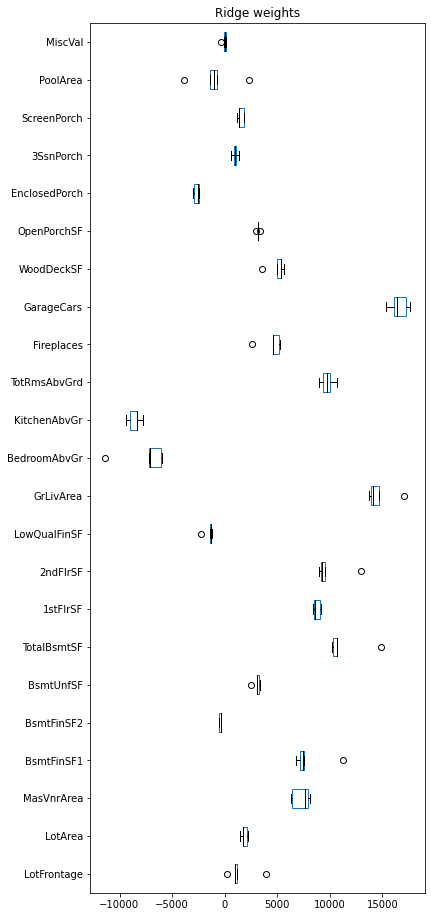

In [13]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge = pd.DataFrame(coefs, columns=non_cargarage)
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

In [14]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[280.72162039411756,
 385.6620421163472,
 280.72162039411756,
 385.6620421163472,
 78.80462815669912]

## New Data Set for Classification Problem

In [15]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [16]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [18]:
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression())

cv_result = cross_validate(logistic_regression, data, target,
                           cv=10, return_estimator=True)
cv_result

{'fit_time': array([0.07145047, 0.06986856, 0.07146478, 0.07143998, 0.07064414,
        0.07163715, 0.07154369, 0.07372165, 0.07238889, 0.07133842]),
 'score_time': array([0.00683618, 0.00682783, 0.00676942, 0.00677514, 0.00667143,
        0.00705457, 0.00673223, 0.00708199, 0.00672841, 0.00659442]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  (

In [19]:
print(f"{cv_result['test_score'].mean():.3f} +/- {cv_result['test_score'].std():.3f}")

0.800 +/- 0.004


In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')

cv_result_dummy = cross_validate(dummy_clf, data, target, cv = 10)
cv_result_dummy

{'fit_time': array([0.01578879, 0.01552844, 0.01587868, 0.01598072, 0.01581788,
        0.01599956, 0.01587319, 0.01597476, 0.01579952, 0.01583242]),
 'score_time': array([0.00594878, 0.00556183, 0.00552511, 0.0057168 , 0.00558496,
        0.00578713, 0.00560141, 0.00577521, 0.00571918, 0.00557017]),
 'test_score': array([0.76069601, 0.76069601, 0.76085176, 0.76085176, 0.76085176,
        0.76064701, 0.76064701, 0.76064701, 0.76064701, 0.76064701])}

In [21]:
print(f"{cv_result_dummy['test_score'].mean():.3f} +/- {cv_result_dummy['test_score'].std():.3f}")

0.761 +/- 0.000


In [30]:
columns = ['age','capital-gain','capital-loss','hours-per-week']

coefs = [est[-1].coef_ for est in cv_result["estimator"]]

coefs = pd.DataFrame(np.concatenate(coefs),columns=columns)

weight = coefs.mean()

KeyError: 'estimator'

Text(0.5, 1.0, 'Weights of the logistic regression')

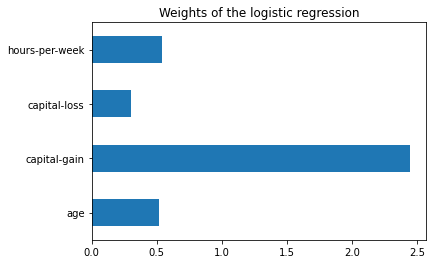

In [25]:
b

In [26]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [28]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [49]:
import numpy as np
from sklearn.pipeline import FeatureUnion, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


preprocessor = ColumnTransformer(transformers=[
    ("num-preprocessor", StandardScaler(), numerical_columns),
    ('cat-preprocessor',OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

cv_result = cross_validate(model, data, target,
                           cv=5, return_estimator=True)
cv_result

{'fit_time': array([1.17437935, 1.1237998 , 1.03257751, 1.10266781, 1.12768102]),
 'score_time': array([0.03413773, 0.03371453, 0.03385091, 0.03598356, 0.03361058]),
 'estimator': [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('num-preprocessor',
                                                    StandardScaler(),
                                                    ['age', 'capital-gain',
                                                     'capital-loss',
                                                     'hours-per-week']),
                                                   ('cat-preprocessor',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    ['workclass', 'education',
                                                     'marital-status',
                                                     'occupation', 'relationship',
                        

In [50]:
print(f"{cv_result['test_score'].mean():.3f} +/- {cv_result['test_score'].std():.3f}")

0.851 +/- 0.003


In [51]:
#14
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["cat-preprocessor"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

In [59]:
coefs = cv_result["estimator"][0][-1].coef_
coefs

array([[ 3.32619364e-01,  2.32335582e+00,  2.58825264e-01,
         3.55079947e-01, -8.78963770e-02,  6.94751412e-01,
         3.34215688e-02, -1.62179836e-01,  1.93893112e-01,
         3.38086899e-01, -3.12413797e-01, -1.48973386e-01,
        -5.80596285e-01, -8.06164312e-01, -6.72124147e-01,
        -3.38413817e-01, -1.26343014e+00, -1.10952381e+00,
        -1.25079649e+00, -1.01478165e+00,  5.48105527e-01,
         5.14402994e-01,  1.12133389e+00,  2.08301007e+00,
        -3.22223153e-04,  1.45369637e+00, -1.58592333e+00,
         1.92626066e+00,  3.62763716e-01, -5.49673864e-01,
         1.51499360e+00,  1.54617220e+00, -4.36419913e-01,
        -1.02910744e+00, -7.41099303e-01, -3.36771964e-01,
        -2.50076213e-01,  1.40196239e-01,  2.57761955e-01,
         2.15557963e-01,  9.45555739e-01, -8.55173917e-01,
        -5.77879001e-01, -1.10876875e-01, -6.91780432e-01,
        -1.72483825e+00,  6.98373326e-01,  6.81864725e-01,
         4.22808180e-01,  7.55705976e-01,  6.08938962e-0

In [65]:
coefs = pd.DataFrame(coefs,columns=feature_names)
coefs.sort_values(axis = 1, ascending=False, by =0)

,workclass_ Federal-gov,education_ Prof-school,marital-status_ Married-civ-spouse,marital-status_ Widowed,marital-status_ Separated,marital-status_ Divorced,education_ Preschool,race_ Other,occupation_ Other-service,native-country_ Laos,...,occupation_ Priv-house-serv,native-country_ United-States,education_ Doctorate,occupation_ Adm-clerical,education_ Assoc-voc,education_ Bachelors,education_ Assoc-acdm,native-country_ El-Salvador,marital-status_ Married-AF-spouse,occupation_ Tech-support
0,2.323356,2.08301,1.926261,1.546172,1.514994,1.453696,1.121334,1.110644,0.945556,0.869507,...,-0.855174,-0.891374,-1.014782,-1.029107,-1.109524,-1.250796,-1.26343,-1.416754,-1.585923,-1.724838


In [66]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

ValueError: Shape of passed values is (5, 1), indices imply (5, 106)